In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
df = pd.read_csv("Telecom_customer_churn.csv")

In [3]:
# Dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#top 5 rows fo the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#top 20 rows of the dataset
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
#Last 5 rows of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
#size of datset
df.size

147903

In [8]:
#shape of dataset
df.shape

(7043, 21)

In [9]:
#datatype of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#min of dataset
df.min()

customerID                         0002-ORFBO
gender                                 Female
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                      0
PhoneService                               No
MultipleLines                              No
InternetService                           DSL
OnlineSecurity                             No
OnlineBackup                               No
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          18.25
TotalCharges                                 
Churn                                      No
dtype: object

In [11]:
#mean of dataset
df.mean()

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [12]:
#max of dataset
df.max()

customerID            9995-HOTOH
gender                      Male
SeniorCitizen                  1
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                 Yes
MultipleLines                Yes
InternetService               No
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges               999.9
Churn                        Yes
dtype: object

In [13]:
# Mode of dataset
df.mode()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Male,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
1,0003-MKNFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-EXCHZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#informations of dataset and used memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Name of columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# Values in the dataset
df.columns.value_counts()

customerID          1
DeviceProtection    1
TotalCharges        1
MonthlyCharges      1
PaymentMethod       1
PaperlessBilling    1
Contract            1
StreamingMovies     1
StreamingTV         1
TechSupport         1
OnlineBackup        1
gender              1
OnlineSecurity      1
InternetService     1
MultipleLines       1
PhoneService        1
tenure              1
Dependents          1
Partner             1
SeniorCitizen       1
Churn               1
dtype: int64

In [17]:
#checking Null Values in the dataset
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#checking the sum of the Dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

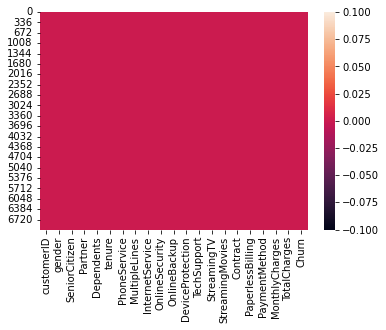

In [19]:
#checking Null values by heatmap
sns.heatmap(df.isnull())

In [20]:
#again checking information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
#checking any space in the dataset
(df==' ?')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:

(df == ' ?').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
(df == ' ')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
(df == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
#checking any null value in the target column
df[df['Churn'] == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [26]:
df[df['Churn'] == ''].index

Int64Index([], dtype='int64')

In [27]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [28]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['Churn'].nunique()

2

In [30]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


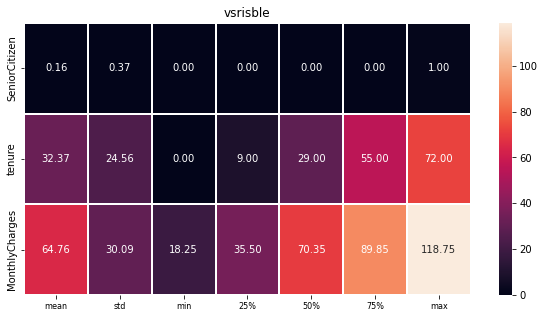

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=14)
plt.xticks(fontsize=8)
plt.title('vsrisble')
plt.show()

In [33]:
for i in df:
    print(i)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


# Observation of describe dataset

The summery is this dataset is very good there is no negative value present in the dataset.
3 continious coluns are present in the dataset "Monthly changes, Tenure, seniorcitizen".
18 categorical columns are also present in the dataset = customerID, gender, Partner, Dependents, PhoneService, MultipleLines,
InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges, Churn.

there is Total Charges data are float type but its data type is object so we will convert it into float data type.

The mean of continuous columns is 7043.000000	which means there is no null values present in the continuous columns.

Total Number of rows and columns are :- 7043 and 21

As we can see only Senior citizen has only max value which is 1 but 25% ,50% and 75% has minimum value is 0 so we need to check it.

we are determining the mean ,min,max and Standard deviation of each column

# Senior Citizen
Mean   = 0.162147
min    = 0.000000	
max    = 1.000000
std    = 0.368612

# Tenure
Mean   = 32.371149
min    = 0.000000	
max    = 72.000000	
std    = 24.559481

# Monthly changes
Mean   = 64.761692
min    = 18.250000	
max    = 118.750000	
std    = 30.090047

# Data Cleaning And Preprocessing

#   Since there are no Null values in the dataset, so we need to treat them.

In [34]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [35]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [36]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [37]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

# Changing the data type of Total Charges

In [38]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [39]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [40]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [41]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [42]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [43]:
# After changes the data type now it have 11 null values so we need ro treat them

In [44]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [45]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
df[df['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Dropping /deleting the rows with missing values in Tenure columnsince there are 11 rows and deleting only then will now effect on the dataset

In [47]:
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)

In [48]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Deleted "customerID" which has no relation with target Column

In [49]:
df = df.drop(columns = 'customerID', axis = 1)

In [50]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualization 

# Univariate Analysis

Using count plot for categorical columns

In [52]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Male      3549
Female    3483
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

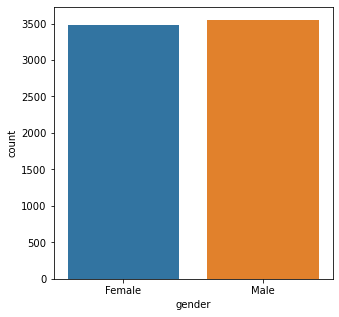

In [53]:
print(df['gender'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('gender',data=df)

We can see Male (Total No= 3549) are more compare to Female (Total No= 3483).

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

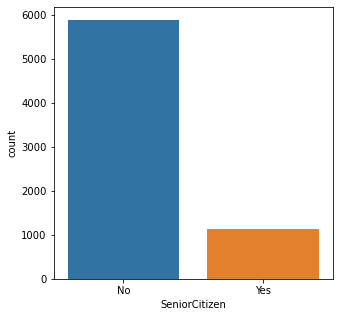

In [54]:
print(df['SeniorCitizen'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('SeniorCitizen',data=df)

We can see SeniorCitizen are less (Total No= 1142) and not SeniorCitizen are more (Total No= 5890).

No     3639
Yes    3393
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

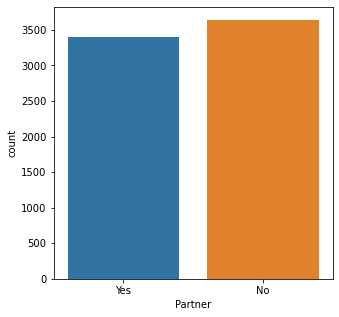

In [55]:
print(df['Partner'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Partner',data = df)

We can see Partner are less (Total No= 3393) and not having Partner are more (Total No= 3639).

No     4933
Yes    2099
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

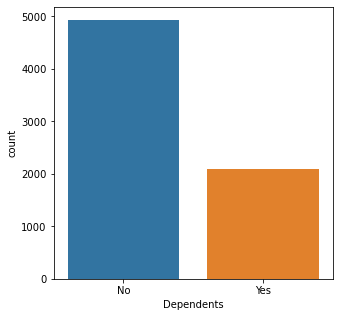

In [56]:
print(df['Dependents'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Dependents',data = df)

We can see Dependents are less (Total No= 2099) and not having Dependents are more (Total No= 4933).

Yes    6352
No      680
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

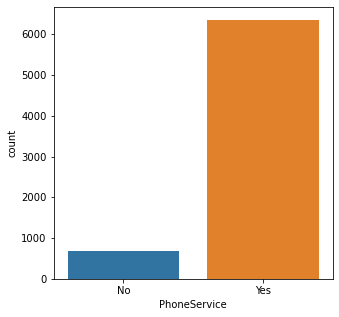

In [57]:
print(df['PhoneService'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('PhoneService',data=df)

We can see having PhoneService are more (Total No= 6352) and not having PhoneService are less (Total No= 680).

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

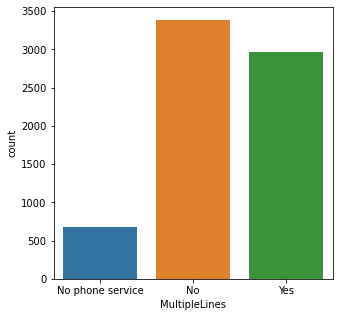

In [58]:
print(df['MultipleLines'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot('MultipleLines',data=df)

We can see not having "MultipleLines" is more (Total No= 3385) compare to having "MultipleLines" (Total No= 2967).
Having "No phone service" is least (Total No= 680)

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

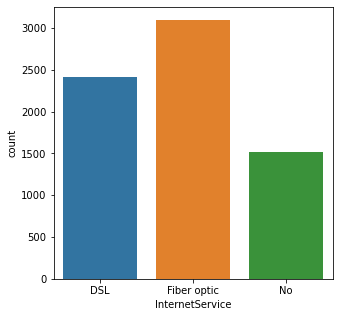

In [59]:
print(df['InternetService'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('InternetService',data = df)

We can see the difference in Internet Services column in which Fiber optic is 3096 and DSL is 2416 and No internet servise 1520

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

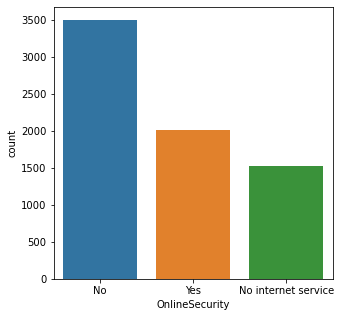

In [60]:
print(df['OnlineSecurity'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('OnlineSecurity',data = df)

We can see not having "OnlineSecurity" is more (Total No= 3497) compare to having "OnlineSecurity" (Total No= 2015).
Having "No internet service" is least (Total No= 1520)

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

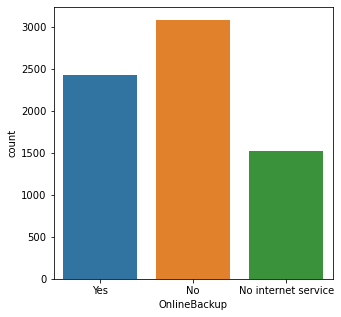

In [61]:
print(df['OnlineBackup'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot('OnlineBackup',data=df)

We can see not having "OnlineBackup" is more (Total No= 3087) compare to having "OnlineBackup" (Total No= 2425).
Having "No internet service" is least (Total No= 1520)

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

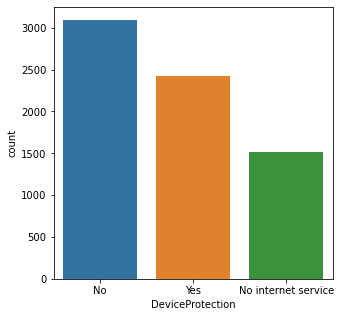

In [62]:
print(df['DeviceProtection'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('DeviceProtection',data=df)

We can see not having "DeviceProtection" is more (Total No= 3094) compare to having "DeviceProtection" (Total No= 2418).
Having "No internet service" is least (Total No= 1520)

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

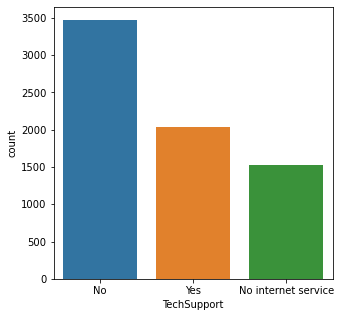

In [63]:
print(df['TechSupport'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot('TechSupport',data = df)

We can see not having "TechSupport" are more (Total No= 3472) compare to having "TechSupport" (Total No= 2040).
Having "No internet service" is least (Total No= 1520)

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

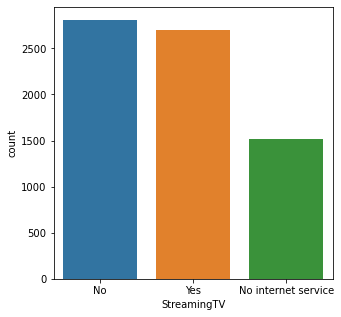

In [64]:

print(df['StreamingTV'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot('StreamingTV',data = df)

We can see not "StreamingTV" are more (Total No= 2809) compare to "StreamingTV" (Total No= 2703).
Having "No internet service" is least (Total No= 1520)

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

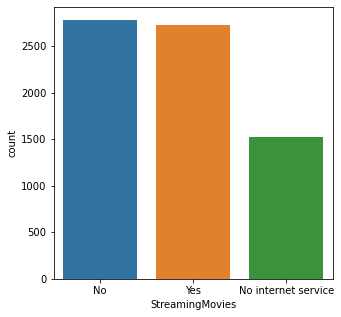

In [65]:
print(df['StreamingMovies'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot('StreamingMovies',data=df)

We can see not "StreamingMovies" are more (Total No= 2781) compare to "StreamingMovies" (Total No= 2731).
Having "No internet service" is least (Total No= 1520)

In [66]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

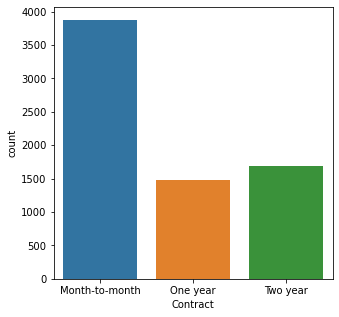

In [67]:
print(df['Contract'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot('Contract', data = df)

We can see "Contract" done with customers for Month-to-month is more (Total No= 3875) and done for One year is less (Total No= 1472)
and for twe year total no. is 1472

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

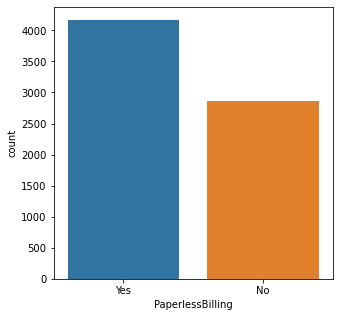

In [68]:
print(df['PaperlessBilling'].value_counts())
plt.figure(figsize =(5,5))
sns.countplot('PaperlessBilling',data = df)

We can see PaperlessBilling are done more (Total No= 4168) compare to not done PaperlessBilling (Total No= 2864).

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

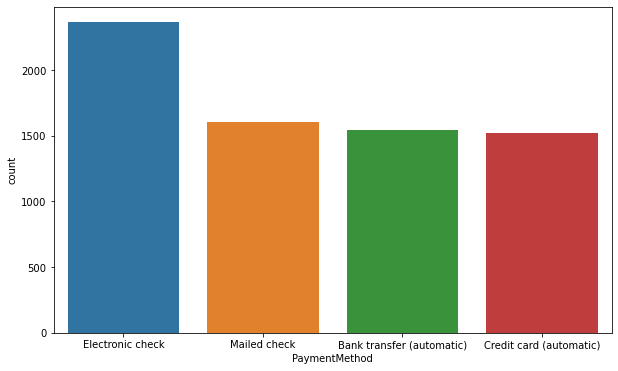

In [69]:
print(df['PaymentMethod'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot('PaymentMethod',data=df)

We can see PaymentMethod "Electronic check" is used more (Total No= 2365) and "Credit card (automatic)" is used less (Total No= 1522).
"Mailed check" (Total No= 1612) and "Bank transfer (automatic)" (Total No= 1544) is also used as PayemntMethod but less than "Electronic check" and more than "Credit card"

No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

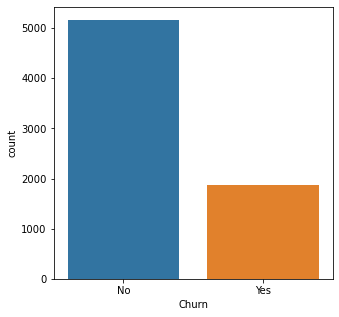

In [70]:
print(df['Churn'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Churn',data = df)

We can see Churn are less (Total No= 1869) and not having Churn are more (Total No= 5163). It shows 1869 number of customers no longer want to purchase goods and services from the business.

In [71]:
#   Contunue hist plot : -

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64


<AxesSubplot:xlabel='tenure', ylabel='Count'>

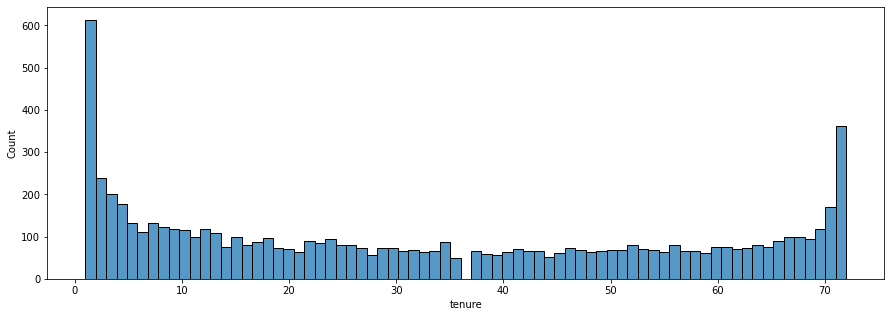

In [72]:
#Histplot for "tenure" column
print(df["tenure"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='tenure',data=df,bins=73)

In [73]:
# We can see thet the higher value in tenure is tenure 1 (total No. 613)

20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

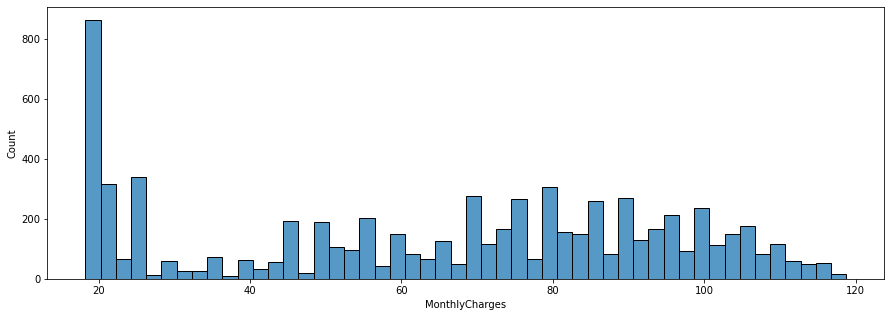

In [74]:
#Histplot for "MonthlyCharges" column
print(df["MonthlyCharges"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='MonthlyCharges',data=df,bins=50)

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

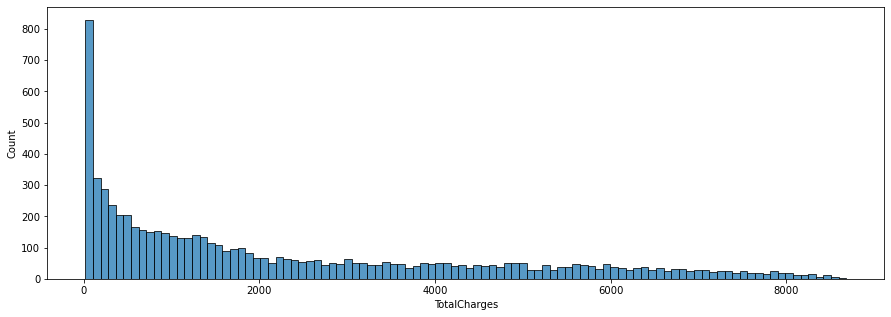

In [75]:
#Histplot for "TotalCharges" column
print(df["TotalCharges"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='TotalCharges',data=df,bins=100)

We can see having TotalCharges 20.20 is highest (Total No= 11)

In [76]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

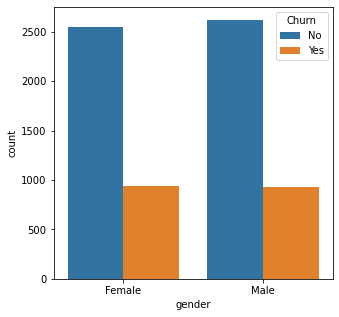

In [77]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('gender', data=df,hue='Churn')

Male customer are few more compare to female and small difference in churn rate is of Male and Female. So, through Gender we cannot determine churn rate and we can say that it is not good measure for churn rate.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

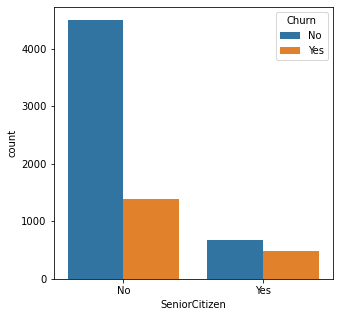

In [78]:
plt.figure(figsize=(5,5))
sns.countplot('SeniorCitizen',data=df,hue='Churn')

In SeniorCitizen also there is small differnce to determine churn rate but those who are young and not SeniorCitizen are determining churn rate as there is differnce in churn and not churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

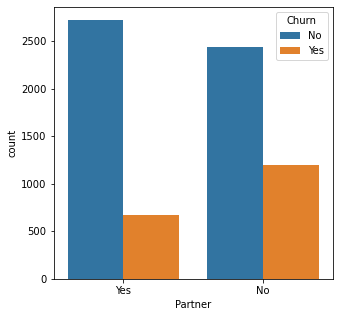

In [79]:
plt.figure(figsize=(5,5))
sns.countplot('Partner',data=df, hue = 'Churn')

Those customer who have Partner are having less churn compare to those having Partner.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

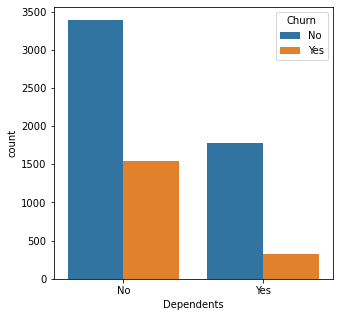

In [80]:
plt.figure(figsize = (5,5))
sns.countplot('Dependents',data=df,hue='Churn')

Those customer who have Dependents are having less churn but those customers who have no Dependents are having more churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

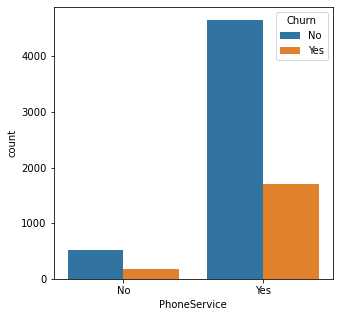

In [81]:
plt.figure(figsize = (5,5))
sns.countplot('PhoneService',data=df,hue='Churn')

Those customer who have PhoneService are having less churn but more than those who have No PhoneService.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

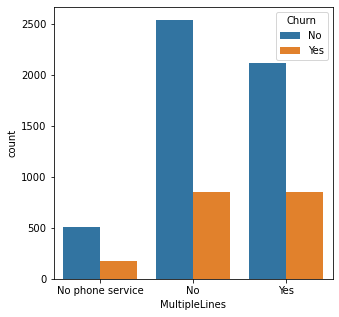

In [82]:
plt.figure(figsize = (5,5))
sns.countplot('MultipleLines',data=df,hue='Churn')

MultipleLines having No Phone Service having less churn and those having or not having MultipleLines have equal churn rate.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

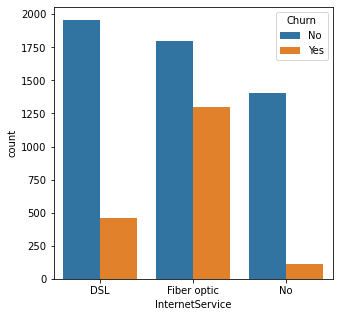

In [83]:
plt.figure(figsize=(5,5))
sns.countplot('InternetService',data=df,hue='Churn')

No InternetService having less churn and those having Fiber Optic InternetService are having more churn.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

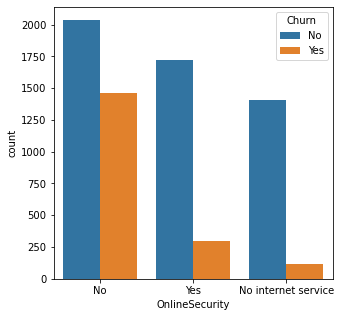

In [84]:
plt.figure(figsize = (5,5))
sns.countplot('OnlineSecurity',data=df,hue='Churn')

OnlineSecurity having No InternetService are having less churn and not having OnlineSecurity are having more churn.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

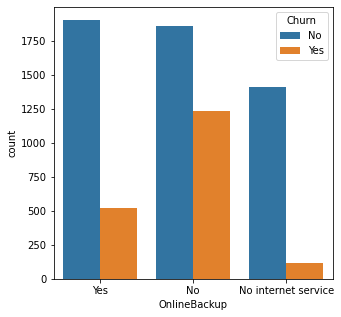

In [85]:
plt.figure(figsize=(5,5))
sns.countplot('OnlineBackup',data=df,hue='Churn')

OnlineBackup having No InternetService are having less churn and not having OnlineBackup are having more churn.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

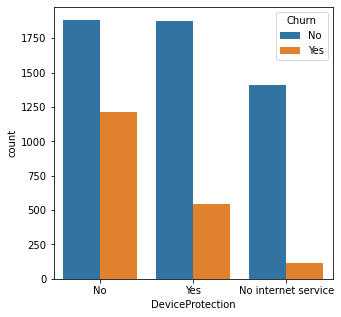

In [86]:
plt.figure(figsize=(5,5))
sns.countplot('DeviceProtection',data=df,hue='Churn')

DeviceProtection having No InternetService are having less churn and not having DeviceProtection are having more churn.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

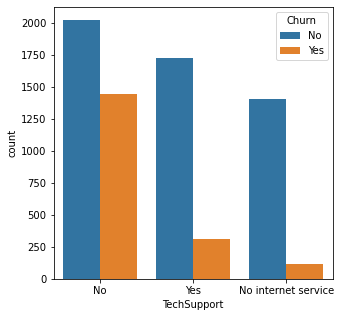

In [87]:
plt.figure(figsize=(5,5))
sns.countplot('TechSupport',data=df,hue='Churn')

TechSupport having No InternetService are having less churn and not having TechSupport are having more churn

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

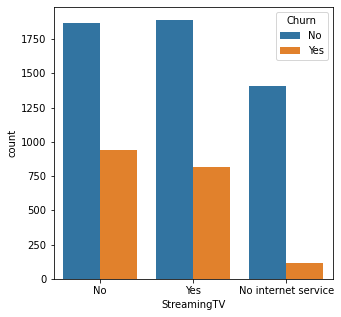

In [88]:
plt.figure(figsize = (5,5))
sns.countplot('StreamingTV',data=df,hue='Churn')

StreamingTV having No InternetService are having less churn and not having StreamingTV are having more churn.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

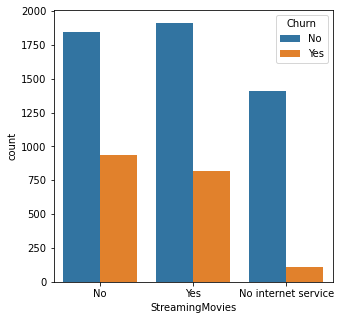

In [89]:
plt.figure(figsize = (5,5))
sns.countplot('StreamingMovies',data=df,hue='Churn')

StreamingMovies having No InternetService are having less churn and not having StreamingMovies are having more churn.

In [90]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Contract', ylabel='count'>

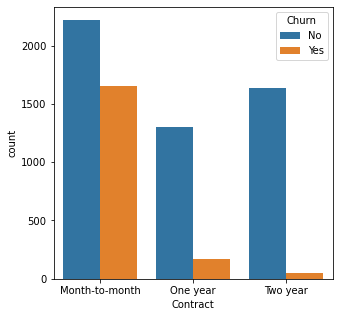

In [91]:
plt.figure(figsize = (5,5))
sns.countplot('Contract',data=df,hue='Churn')

Contract having Month-tomonth are having more churn and for Two year are having less churn.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

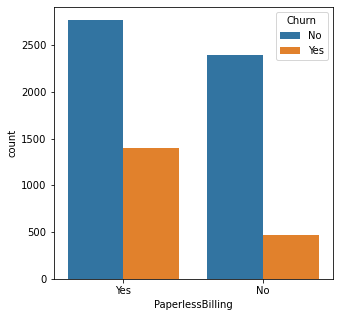

In [92]:
plt.figure(figsize=(5,5))
sns.countplot('PaperlessBilling',data=df,hue='Churn')

having PaperlessBilling are having more churn and not having PaperlessBilling are having less churn.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

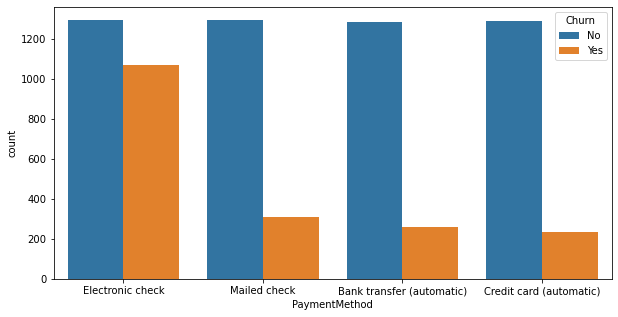

In [93]:
plt.figure(figsize=(10,5))
sns.countplot('PaymentMethod',data=df,hue='Churn')

PaymentMethod used Electronic check having more churn compare to other PaymentMethod. And Credit card PaymentMethod have less churn compare to other PaymentMethod.

In [94]:
 'Using Barplot' 

'Using Barplot'

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

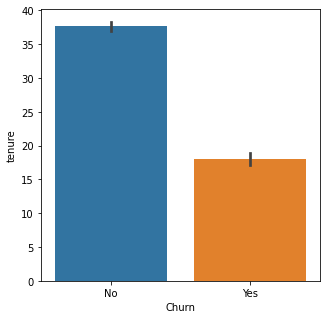

In [95]:
#Bar Plot for comparision between "tenure" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="tenure",data=df, x='Churn')

We can see less churn with high tenure. If tenure is less then churn rate is also High.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

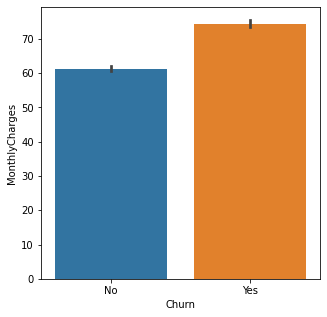

In [96]:
#barplot for comparision between "MonthlyCharges" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="MonthlyCharges",data=df, x='Churn')

We can see High churn with High MonthlyCharges. Less Churn with less MonthlyCharges.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

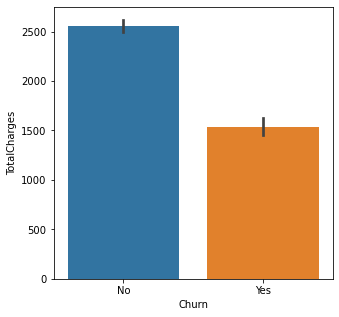

In [97]:
plt.figure(figsize=(5,5))
sns.barplot(y='TotalCharges',data=df,x='Churn')

Less TotalCharges, high churn rate. High TotalCharges less churn rate.

Multivariate Analysis
Using Pairplot

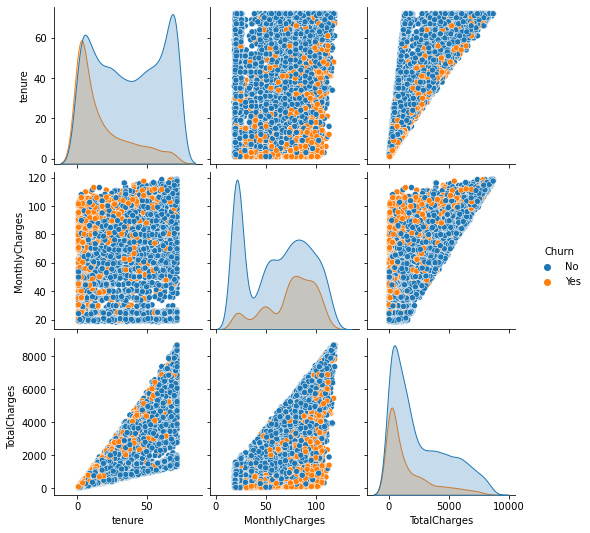

In [98]:
sns.pairplot(df,hue='Churn')

We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.

In [99]:
#   Label Encoding

In [100]:
df.dtypes
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [103]:
enc

LabelEncoder()

In [104]:
df.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [105]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [106]:
#  Checking Correlation

In [107]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


This gives the correlation between the denpendent and independent variables.

In [108]:
df.corr()['Churn'].sort_values()

Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.199484
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

#    We can observe :
All columns are sorted in ascending order showing least to strong correlation with target column.
13 columns are negatively correlated and 7 columns are positively correlated.
Column 'MonthlyCharges' is highly correlated with Target column 'Churn' and Column 'Contract' is least correlated with Target column 'Churn'.

In [109]:
# Checking Correlation with Heatmap

<AxesSubplot:>

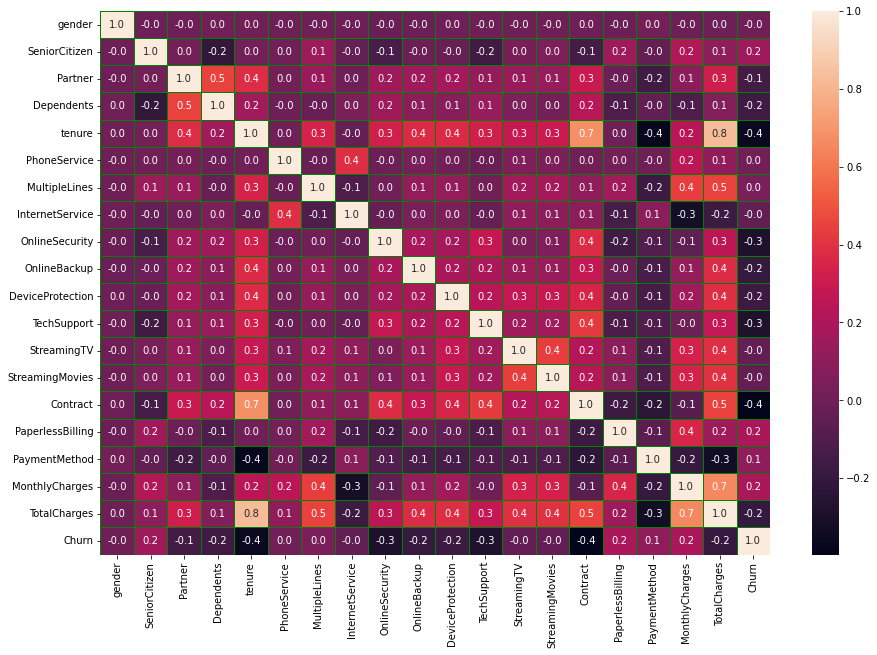

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='green',fmt='.1f')

# Outcome of Correlation


gender has -1 percent correlation with the target column which can be considered as good correlation and negatively correlated.



SeniorCitizen has 15 percent correlation with the target column which can be considered as good correlation and positively correlated.



Partner has -15 percent correlation with the target column which can be considered as good correlation and negatively correlated.



Dependents has -16 percent correlation with the target column which can be considered as good correlation and negatively correlated.



tenure has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated.



PhoneService has 1 percent correlation with the target column which can be considered as good correlation and positively correlated.



MultipleLines has 4 percent correlation with the target column which can be considered as good correlation and positively correlated.



InternetService has -5 percent correlation with the target column which can be considered as good correlation and negatively correlated.



OnlineSecurity has -29 percent correlation with the target column which can be considered as good correlation and negatively correlated.



OnlineBackup has -20 percent correlation with the target column which can be considered as good correlation and negatively correlated.



DeviceProtection has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.



TechSupport has -28 percent correlation with the target column which can be considered as good correlation and negatively correlated.



StreamingTV has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.



StreamingMovies has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.



Contract has -40 percent correlation with the target column which can be considered as weak correlation and negatively correlated.



PaperlessBilling has 19 percent correlation with the target column which can be considered as good correlation and positively correlated.



PaymentMethod has 11 percent correlation with the target column which can be considered as good correlation and positively correlated.



MonthlyCharges has 19 percent correlation with the target column which can be considered as strong correlation and positively correlated.



TotalCharges has -20 percent correlation with the target column which can be considered as good correlation and negatively correlated.



Max correlation is with MonthlyCharges



Min correlation is with Contract




In [111]:
#  Checking Correlation with barplot

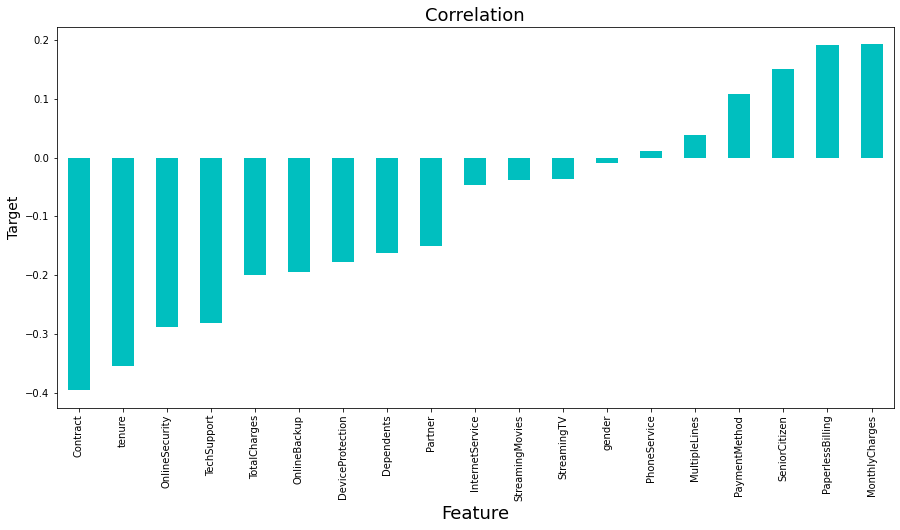

In [112]:
plt.figure(figsize=(15,7))
df.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color = 'c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize = 18)
plt.show()

MonthlyCharges the highest positive correlation with Target column 'Churn' and Contract have the highest negative correlation with Target column 'Churn'.

# Checking Outliers

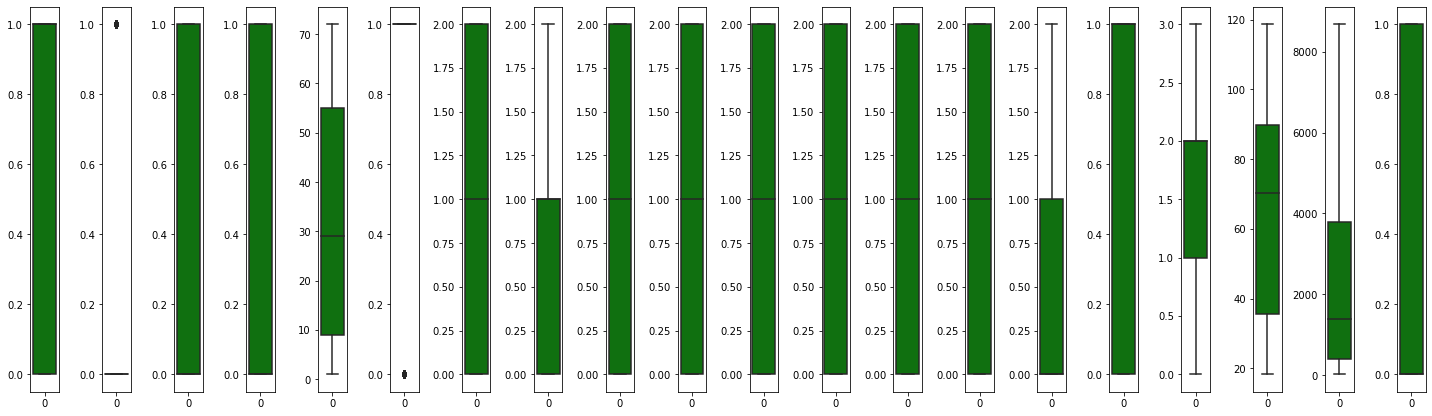

In [113]:
collist=df.columns.values
ncol=21
nrows=11
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=df[collist[column]],color='green',orient='v')
  #  plt.xlabel(column,frontsize = 15)
    plt.tight_layout()

In [114]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We can see Outliers are present only in 2 columns: "SeniorCitizen" and "PhoneService". But both column are categorical, so we will not remove outliers.

# Checking for the skewness

In [115]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

# Observation:
Skewness threshold taken is +/-0.25


All the columns are not normallly distributed, they are skewed.

Columns which are having skewness: SeniorCitizen, Dependents, PhoneService, OnlineSecurity, TechSupport, Contract, PaperlessBilling and TotalCharges.

Since SeniorCitizen, Dependents, PhoneService, OnlineSecurity, TechSupport, Contract and PaperlessBilling are categorical column so we will not remove skewness from them.

Only we will remove skewness from TotalCharges as this column contains continuous data.

#  Checking skweness through Data Visualization

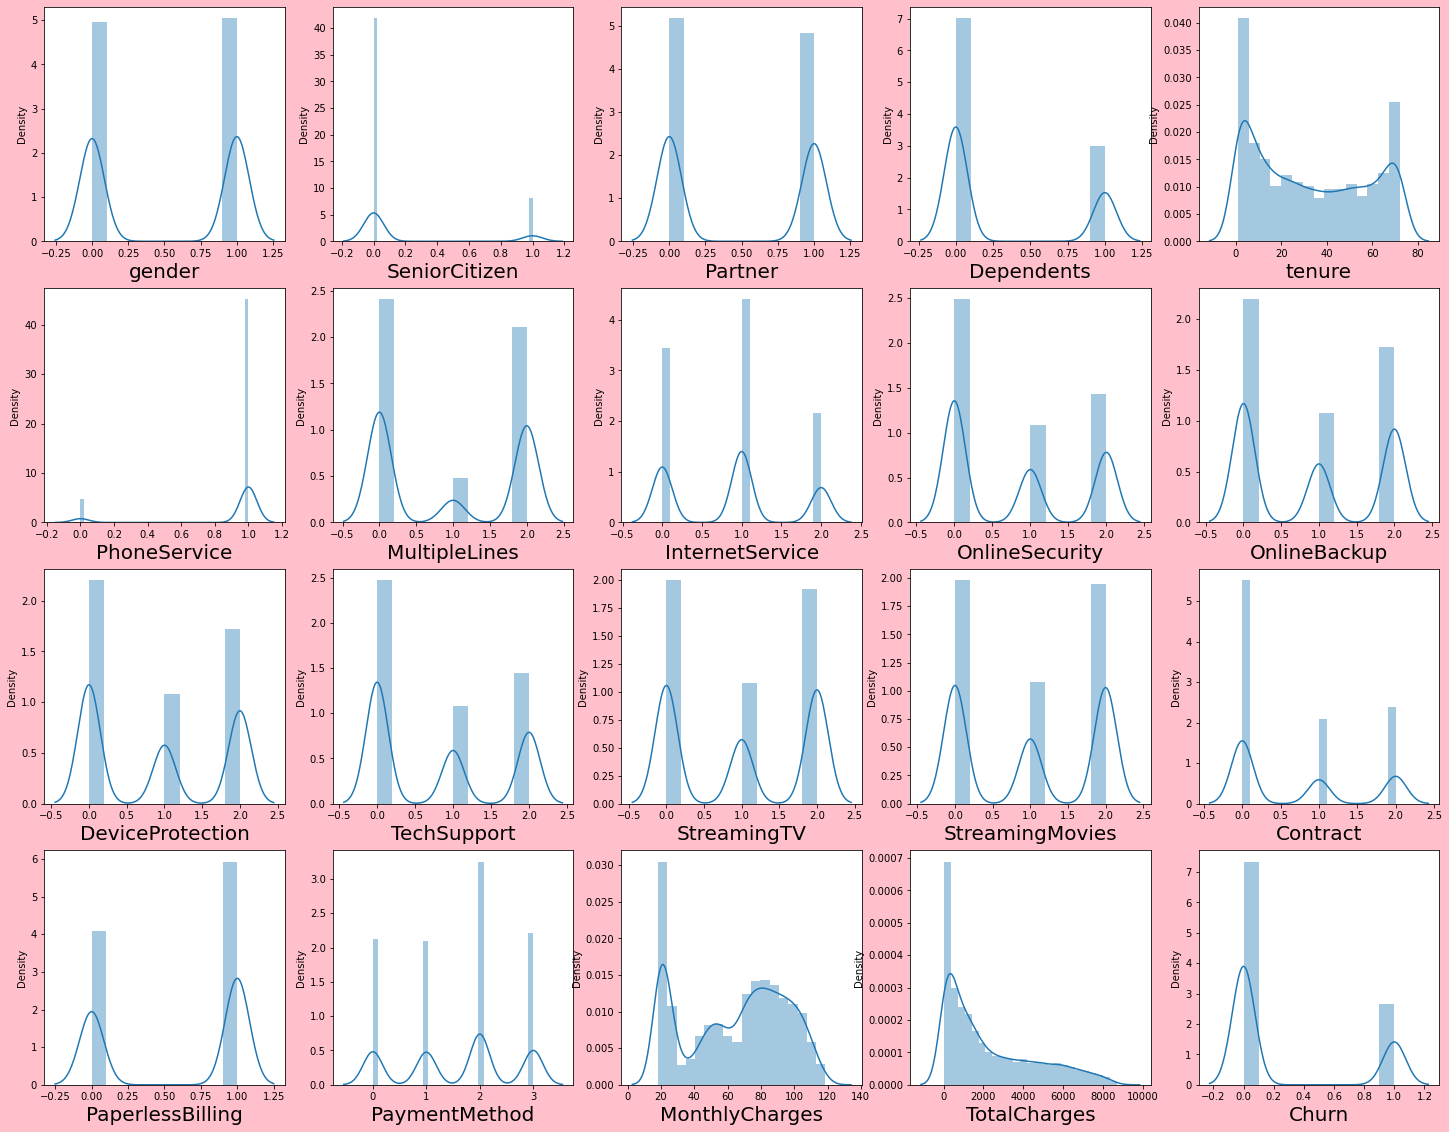

In [116]:
plt.figure(figsize=(25,25), facecolor='pink')
plotnumber = 1

for column in df:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see skewed data

Removing skewness using yeo-johnson method

In [117]:
from sklearn.preprocessing import PowerTransformer

In [118]:
collist = ['TotalCharges']
df[collist]=power_transform(df[collist],method='yeo-johnson')
df[collist]

,TotalCharges
0,-1.810069
1,0.254257
2,-1.386091
3,0.233220
4,-1.248808
...,...
7038,0.296583
7039,1.565846
7040,-0.858393
7041,-0.921477


checking skewness after removal

In [119]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges       -0.144643
Churn               1.060622
dtype: float64

In [120]:
#  checking skewness after removal through data visualization using distplot

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

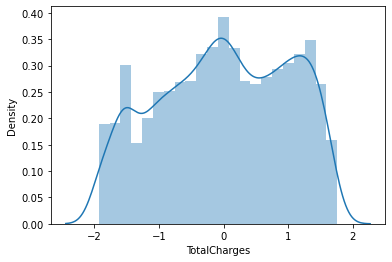

In [121]:
sns.distplot(df['TotalCharges'])

The data is not normal but the skewness has got removed compared to the old data.

#  Data preprocessing

Spliting data into Target and Features:

In [122]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [123]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [124]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810069
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.254257
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.386091
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.233220
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.248808


In [125]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [126]:
x.shape


(7032, 19)

In [127]:
y.shape

(7032,)

In [128]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

Oversampling using the SMOTE

In [129]:
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import SMOTE

In [130]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

#  Scaling data using Standard Scaler

In [131]:
scaler = StandardScaler()

In [132]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [133]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.883893,-0.410644,1.266345,-0.527529,-1.110808,-3.055542,0.059501,-1.265693,-0.753324,1.407470,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,0.427725,-1.328029,-1.662917
1,1.131359,-0.410644,-0.789674,-0.527529,0.260222,0.327274,-1.005338,-1.265693,1.700564,-0.890322,1.396122,-0.764816,-1.056663,-1.056342,0.664873,-1.247373,1.431063,-0.385819,0.373513
2,1.131359,-0.410644,-0.789674,-0.527529,-1.069262,0.327274,-1.005338,-1.265693,1.700564,1.407470,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,1.431063,-0.493599,-1.244669
3,1.131359,-0.410644,-0.789674,-0.527529,0.717232,-3.055542,0.059501,-1.265693,1.700564,-0.890322,1.396122,1.669301,-1.056663,-1.056342,0.664873,-1.247373,-1.578950,-0.895169,0.352761
4,-0.883893,-0.410644,-0.789674,-0.527529,-1.069262,0.327274,-1.005338,0.218808,-0.753324,-0.890322,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,0.427725,0.092240,-1.109241


In [134]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.883893,-0.410644,1.266345,-0.527529,-1.110808,-3.055542,0.059501,-1.265693,-0.753324,1.407470,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,0.427725,-1.328029,-1.662917
1,1.131359,-0.410644,-0.789674,-0.527529,0.260222,0.327274,-1.005338,-1.265693,1.700564,-0.890322,1.396122,-0.764816,-1.056663,-1.056342,0.664873,-1.247373,1.431063,-0.385819,0.373513
2,1.131359,-0.410644,-0.789674,-0.527529,-1.069262,0.327274,-1.005338,-1.265693,1.700564,1.407470,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,1.431063,-0.493599,-1.244669
3,1.131359,-0.410644,-0.789674,-0.527529,0.717232,-3.055542,0.059501,-1.265693,1.700564,-0.890322,1.396122,1.669301,-1.056663,-1.056342,0.664873,-1.247373,-1.578950,-0.895169,0.352761
4,-0.883893,-0.410644,-0.789674,-0.527529,-1.069262,0.327274,-1.005338,0.218808,-0.753324,-0.890322,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,0.427725,0.092240,-1.109241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.883893,-0.410644,-0.789674,-0.527529,-1.027715,0.327274,-1.005338,1.703309,0.473620,0.258574,0.251876,0.452242,0.049827,0.051835,-0.645583,-1.247373,1.431063,-1.658480,-1.372753
10322,-0.883893,-0.410644,-0.789674,-0.527529,-0.653798,0.327274,-1.005338,-1.265693,-0.753324,-0.890322,-0.892370,0.452242,-1.056663,-1.056342,-0.645583,-1.247373,-1.578950,-0.625782,-0.411056
10323,1.131359,-0.410644,-0.789674,-0.527529,-0.903076,-3.055542,0.059501,-1.265693,-0.753324,-0.890322,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,-1.247373,-1.578950,-1.506932,-1.086015
10324,-0.883893,2.435200,-0.789674,-0.527529,-0.570705,0.327274,1.124341,0.218808,-0.753324,-0.890322,-0.892370,-0.764816,-1.056663,-1.056342,-0.645583,0.801685,0.427725,0.218658,-0.024107


Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [135]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [136]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [137]:
x.columns[var_threshold.get_support()]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [138]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will check through SelectKBest method.

# SelectKBest method

In [139]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [140]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [141]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

             Feature        Score
14          Contract  3764.112493
4             tenure  2109.074417
8     OnlineSecurity  1949.269526
11       TechSupport  1768.973759
3         Dependents  1055.805898
2            Partner   984.688394
9       OnlineBackup   806.976959
18      TotalCharges   768.790869
10  DeviceProtection   686.270330
17    MonthlyCharges   599.782903
15  PaperlessBilling   233.852697
0             gender   201.525798


In [142]:
x=x.drop(['gender'],axis = 1)

In [143]:
x.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

Now, we have completed features selection process through using 2 techniques. So, will check for multicolinearity now.

Checking for Multicollinearity using Variance Inflation Factor

# VIF (Variance Inflation factor)

In [144]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF values,features
0,1.092785,SeniorCitizen
1,1.537302,Partner
2,1.426129,Dependents
3,11.892188,tenure
4,1.702112,PhoneService
5,1.399396,MultipleLines
6,1.734821,InternetService
7,1.350750,OnlineSecurity
8,1.234779,OnlineBackup
9,1.313043,DeviceProtection


The VIF value is more than 10 in the columns 'tenure' and 'TotalCharges'. But column 'TotalCharges' is having highest VIF value. So, we will drop column 'TotalCharges'.

In [145]:
x.drop('TotalCharges',axis = 1, inplace = True)

In [146]:
x.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')

Checking again Multicolinearity using VIF

In [147]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF Values,features
0,1.092662,SeniorCitizen
1,1.536570,Partner
2,1.423948,Dependents
3,2.832699,tenure
4,1.702093,PhoneService
5,1.392321,MultipleLines
6,1.709634,InternetService
7,1.345614,OnlineSecurity
8,1.233725,OnlineBackup
9,1.310876,DeviceProtection


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

# Creating Model

We are using Classification Model for targated variable "Churn"

In [234]:
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =0)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is :- ', maxAccu, 'on Random State :- ',maxRS)

Best Accuracy is :-  0.7963202065848934 on Random State :-  89


Creating train-test-split

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [183]:
x.shape

(10326, 17)

In [184]:
y.shape

(10326,)

In [185]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((7228, 17), (7228,), (3098, 17), (3098,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

# Logistic Regression 

In [196]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

print('Accuracy Score:- ', accuracy_score(y_test,pred_lr))
print('Confusion Matrix :- \n ', confusion_matrix(y_test,pred_lr))
print('Classification Report :- \n ',classification_report(y_test,pred_lr))

Accuracy Score:-  0.7908327953518399
Confusion Matrix :- 
  [[1193  361]
 [ 287 1257]]
Classification Report :- 
                precision    recall  f1-score   support

           0       0.81      0.77      0.79      1554
           1       0.78      0.81      0.80      1544

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



Here we are getting 79% accuracy using Logistic Regression.

# Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic Regressior Prediction Confusion Maxtrix ')

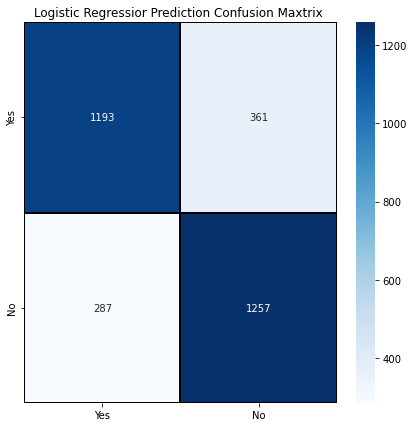

In [200]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ['Yes', 'No']
y_axis_labels = ['Yes', 'No']
f,ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm,annot = True, linewidths=.2,linecolor='black',fmt= '.0f',ax=ax, cmap = 'Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Logistic Regressior Prediction Confusion Maxtrix ')

# Classification Algorithms

# Random Forest Classifier

In [208]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print('Random Forest Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_rfc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_rfc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_rfc))

Random Forest Accuracy Score is:- 
 
   0.8453841187863137

 Confusion Matrix is :-
   [[1299  255]
 [ 224 1320]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.85      0.84      0.84      1554
           1       0.84      0.85      0.85      1544

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



Here we are getting 84% accuracy using Random Forest Classifier.

Confusion Matrix for Random Forest Classifier.

Text(0.5, 1.0, 'RFC Prediction Confusion Matrix')

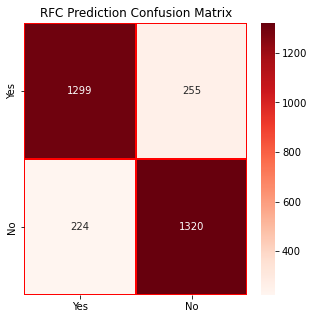

In [210]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='red',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title ('RFC Prediction Confusion Matrix')

In [214]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)


print('Decision Tree Classifier Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_dtc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_dtc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_dtc))

Decision Tree Classifier Accuracy Score is:- 
 
   0.8014848289218851

 Confusion Matrix is :-
   [[1245  309]
 [ 306 1238]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.80      0.80      0.80      1554
           1       0.80      0.80      0.80      1544

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



Here we are getting 80% accuracy using Decision Tree Classifier

Text(0.5, 1.0, 'DTC Prediction Confusion Matrix')

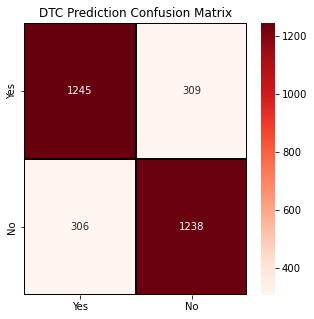

In [215]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('DTC Prediction Confusion Matrix')

# Support Vector Machine Classifier

In [226]:
svc = SVC(kernel='linear',gamma='scale')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print('Accuracy Score :- ',accuracy_score(y_test,pred_svc))
print('Confusion Matrix \n ' ,confusion_matrix(y_test,pred_svc))
print('classification Report \n :- ',confusion_matrix(y_test,pred_svc))

Accuracy Score :-  0.790187217559716
Confusion Matrix 
  [[1152  402]
 [ 248 1296]]
classification Report 
 :-  [[1152  402]
 [ 248 1296]]


Text(0.5, 1.0, 'SVM Classifier confusion_matrix')

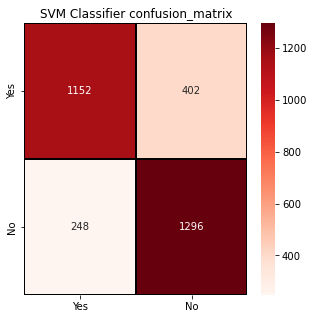

In [227]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title('SVM Classifier confusion_matrix')

# KNN Classifier

In [231]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print('Accuracy Score:- ',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:- ',confusion_matrix(y_test,pred_knn))
print('Classifier Report:- ', classification_report(y_test,pred_knn))

Accuracy Score:-  0.7850225952227243
Confusion Matrix:-  [[1117  437]
 [ 229 1315]]
Classifier Report:-                precision    recall  f1-score   support

           0       0.83      0.72      0.77      1554
           1       0.75      0.85      0.80      1544

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.78      3098
weighted avg       0.79      0.79      0.78      3098



Text(0.5, 1.0, 'KNN Classifier confusion Matrix')

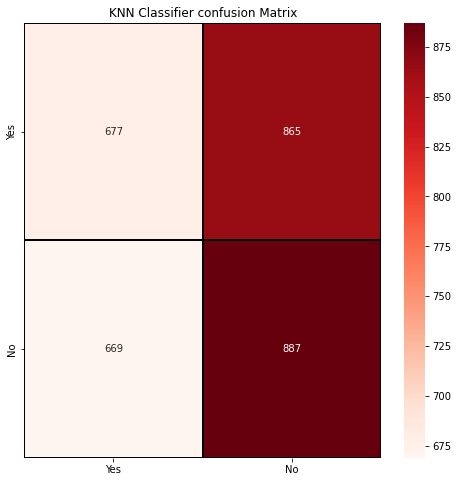

In [238]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ['Yes','No']
x_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('KNN Classifier confusion Matrix')

# Gradient Boosting Classifier

In [267]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.8,max_depth=4)
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
print('GBC Accuracy Score is : ',accuracy_score(y_test,pred_gbc))
print('GBC Confusion Matrix \n',confusion_matrix(y_test,pred_gbc))
print('GBC Classification report \n',classification_report(y_test,pred_gbc))

GBC Accuracy Score is :  0.8321497740477728
GBC Confusion Matrix 
 [[1266  276]
 [ 244 1312]]
GBC Classification report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1542
           1       0.83      0.84      0.83      1556

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



Here we are getting 82% accuracy using Gradient Boosting classifier.

Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Confusion Matrix of GBC')

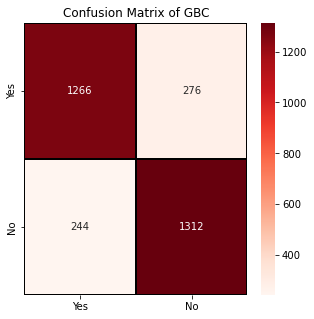

In [268]:
cm = confusion_matrix(y_test,pred_gbc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('Confusion Matrix of GBC')

# XGB Classifier

In [274]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)
print('The Accuracy of XGBC is: ',accuracy_score(y_test,pred_XGBC))
print('Confusion Matrix of XGBC :- \n ', confusion_matrix(y_test,pred_XGBC))
print('classification report of XGBC:- \n ', classification_report(y_test,pred_XGBC))

The Accuracy of XGBC is:  0.8331181407359587
Confusion Matrix of XGBC :- 
  [[1225  317]
 [ 200 1356]]
classification report of XGBC:- 
                precision    recall  f1-score   support

           0       0.86      0.79      0.83      1542
           1       0.81      0.87      0.84      1556

    accuracy                           0.83      3098
   macro avg       0.84      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



Confusion Matrix for XGBC Classifier

Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

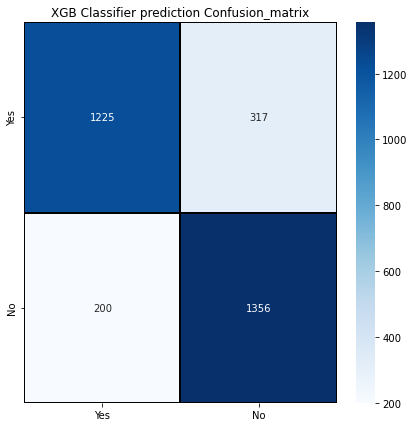

In [280]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

# Cross Validation Score for all the model

In [281]:
#    CV Score for Logistic Regrassion 
print('CV Score for logistic Regression :- ',cross_val_score(lr,x,y,cv=5).mean())

#    CV Score for Random Forest Classifier

print('CV Score for Random Forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

#    CV Score for Decision tree Classifier

print('CV score for Decision Tree Classifier',cross_val_score(dtc,x,y,cv=5).mean())


#    CV Score for support vector Classifire

print('CV Score for Support Vector Classifier ',cross_val_score(svc,x,y,cv=5).mean())

#  CV Score for KNN classifier

print('CV Score for KNN Classifier',cross_val_score(knn,x,y,cv=5).mean())

#    CV Score for Gradian boosting Classifier

print('CV Score for Gradian Boosting Classifier',cross_val_score(gbc,x,y,cv=5).mean())

#   CV score for XGB Classifier

print('CV Score for XGB Classifier',cross_val_score(XGBC,x,y,cv=5).mean())

CV Score for logistic Regression :-  0.7852056939401681
CV Score for Random Forest Classifier:  0.836051979588823
CV score for Decision Tree Classifier 0.7855966190765278
CV Score for Support Vector Classifier  0.7795878386138777
CV Score for KNN Classifier 0.7782342034882767
CV Score for Gradian Boosting Classifier 0.8107780765020662
CV Score for XGB Classifier 0.8130990626516248


## From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

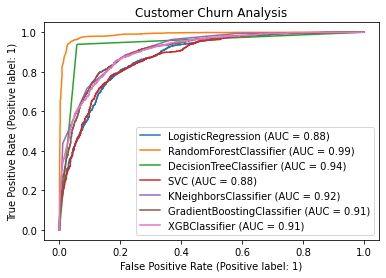

In [285]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(XGBC,x_test,y_test,ax=disp.ax_)

plt.title('Customer Churn Analysis')
plt.legend(prop={'size' : 10},loc = 'lower right')
plt.show()

###### Hyper Perametertuning for best model using GridsearchCV

# The XGB Classifier with GridsearchCV

In [286]:
from sklearn.model_selection import KFold

In [287]:
params = {
    
    'n_estimators' : [100,200,500],
    'Learning rate' : [0.01,0.05,0.01],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha' : [0,0.5,1],
    'reg_lambda': [0.5,1,5],
    'base_score': [0.2,0.5,1]
}

In [289]:
CV_XGBC = GridSearchCV(XGBClassifier(n_jobs=-1),params,n_jobs=-1,cv = KFold(n_splits=3),scoring='roc_auc')

In [290]:
CV_XGBC.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'Learning rate': [0.01, 0.05, 0.01],
                         'base_score': [0.2, 0.5, 1],
                         'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1], 'n_estimators': [100, 200, 500],
                         'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.5, 1, 5]},
             scoring='roc_auc')

In [292]:
CV_XGBC.best_params_

{'Learning rate': 0.01,
 'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'n_estimators': 500,
 'reg_alpha': 0.5,
 'reg_lambda': 1}

In [293]:
CV_XGBC.best_estimator_

XGBClassifier(Learning rate=0.01, base_score=0.2, gamma=0.5, n_estimators=500,
              n_jobs=-1, reg_alpha=0.5)

In [294]:
Customer_Churn = XGBClassifier(base_score=0.2,booster='gbtree',gamma=0.5,learning_rate=0.1,n_estimators = 500, reg_alpha=0.5,reg_lambda=1)

In [295]:
Customer_Churn.fit(x_train,y_train)

XGBClassifier(base_score=0.2, gamma=0.5, n_estimators=500, reg_alpha=0.5)

In [300]:
pred=Customer_Churn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,pred))
print('\n  confusion matrix  \n',confusion_matrix(y_test,pred))
print('\n  Classification_matrix  \n',classification_report(y_test,pred))

Accuracy Score 0.8473208521626856

  confusion matrix  
 [[1269  273]
 [ 200 1356]]

  Classification_matrix  
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1542
           1       0.83      0.87      0.85      1556

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



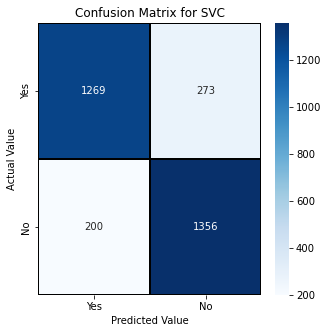

In [301]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor='black',fmt = '.0f',ax=ax,cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for SVC')
plt.show()

## Here the final model gives 84% accuracy after tuning.

In [302]:
#   ROC-AUC Curve

In [303]:
fpr,tpr,threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

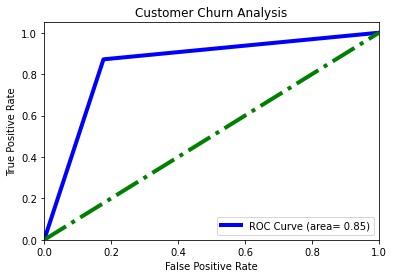

In [311]:
plt.figure()
plt.plot(fpr,tpr,color="blue",lw=4,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="green",lw=4,linestyle="dashdot")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Customer Churn Analysis")
plt.legend(loc="lower right")
plt.show()

this is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.84.

#  Saving the Model

In [312]:
import pickle
filename = 'Customer Churn_Analysis.pickle'
pickle.dump(CV_XGBC,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 1])

#   Checking predicted and original values

In [316]:
a = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
Customer_Churn_Analysis = pd.DataFrame({'Original': a, 'Predicted': predicted}, index=range(len(a)))
Customer_Churn_Analysis

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
3093,0,0
3094,1,1
3095,0,0
3096,0,0


As we can see, predicted and original values matches approx 99%

Saving the model

In [320]:
model = Customer_Churn_Analysis.to_csv('Customer_Churn_Analysis.csv')
model

In [321]:
model